In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,cross_val_score
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv")

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.shape

(31647, 18)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(31647, 18)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.6+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31647.0,22563.972162,13075.936990,2.0,11218.0,22519.0,33879.5,45211.0
age,31647.0,40.957247,10.625134,18.0,33.0,39.0,48.0,95.0
balance,31647.0,1363.890258,3028.304293,-8019.0,73.0,450.0,1431.0,102127.0
day,31647.0,15.835466,8.337097,1.0,8.0,16.0,21.0,31.0
duration,31647.0,258.113534,257.118973,0.0,104.0,180.0,318.5,4918.0
campaign,31647.0,2.765697,3.113830,1.0,1.0,2.0,3.0,63.0
pdays,31647.0,39.576042,99.317592,-1.0,-1.0,-1.0,-1.0,871.0
previous,31647.0,0.574272,2.422529,0.0,0.0,0.0,0.0,275.0


In [10]:
df.drop(['duration','age','ID','balance','day','campaign'],axis=1,inplace=True)

In [11]:
df.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

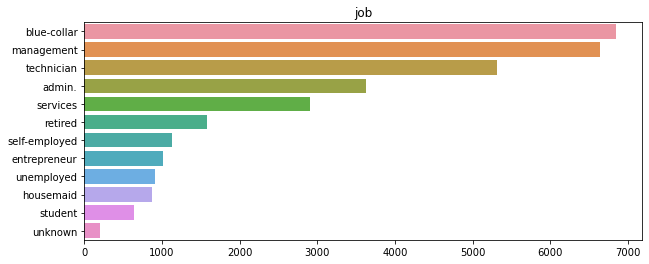

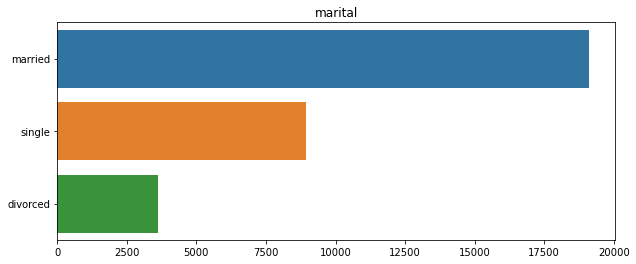

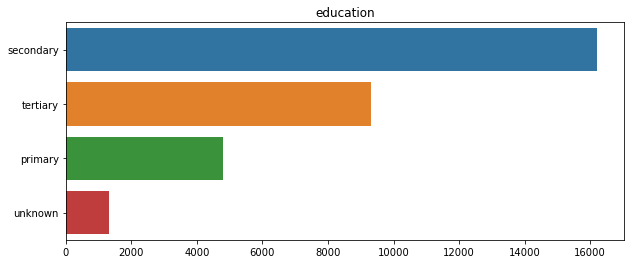

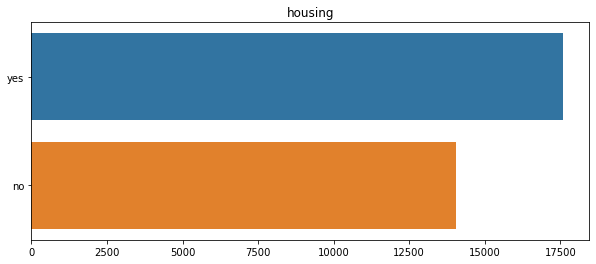

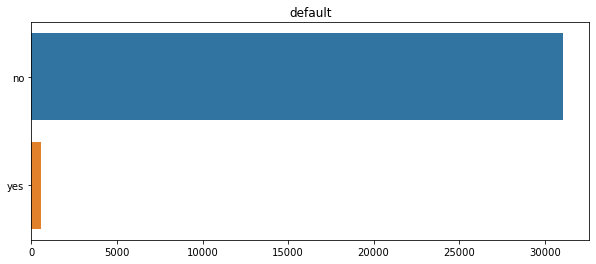

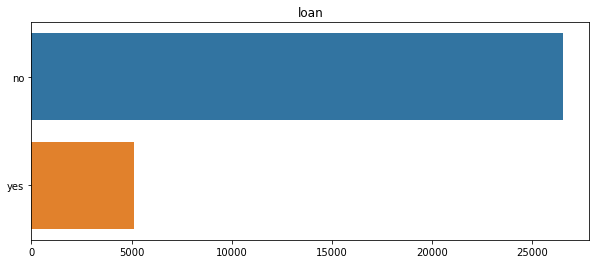

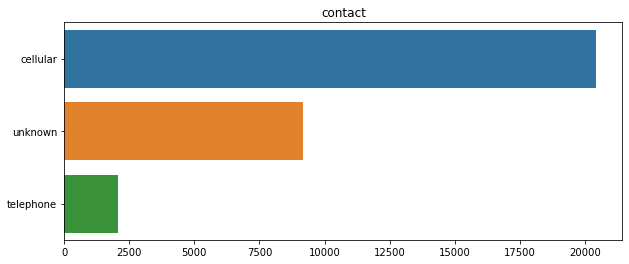

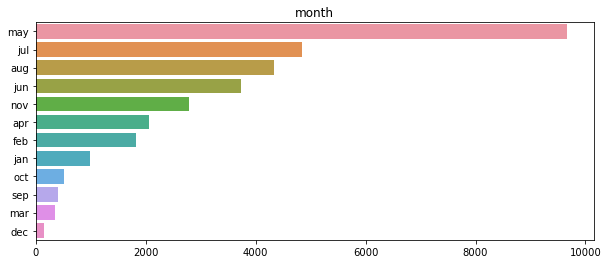

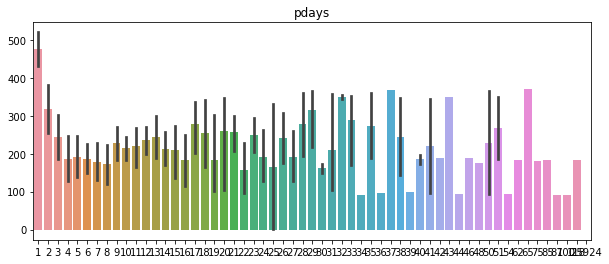

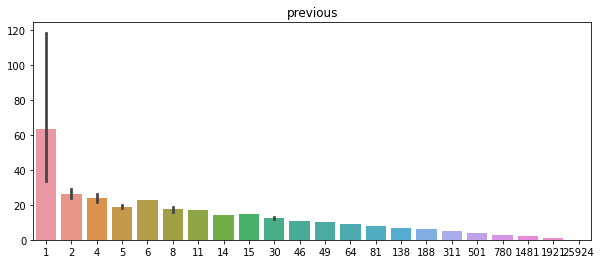

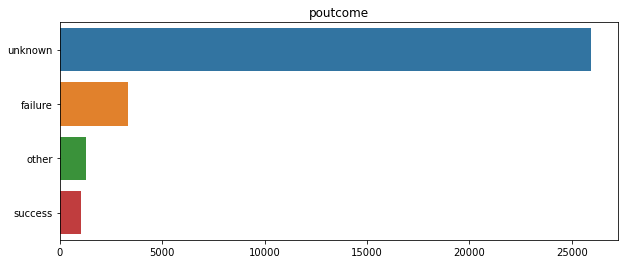

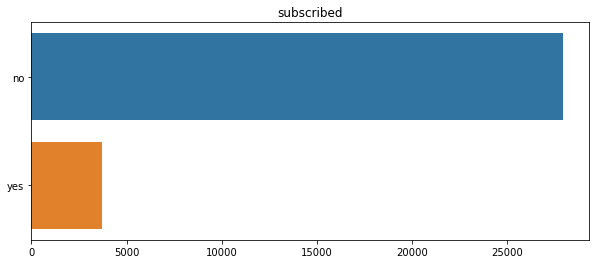

In [12]:
cat_var = ['job', 'marital', 'education','housing', 'default', 'loan', 'contact','month','pdays','previous', 'poutcome', 'subscribed']
for col in cat_var:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.show()

In [13]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

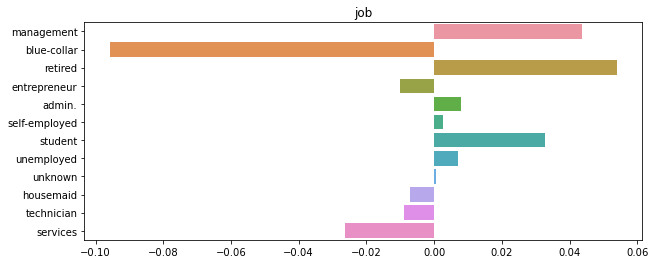

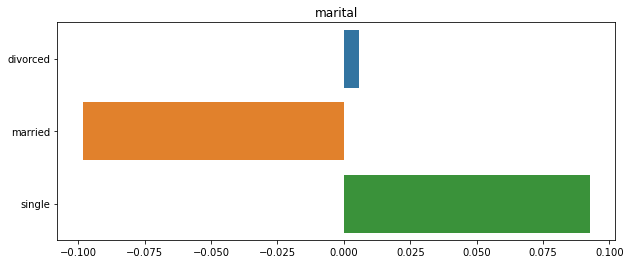

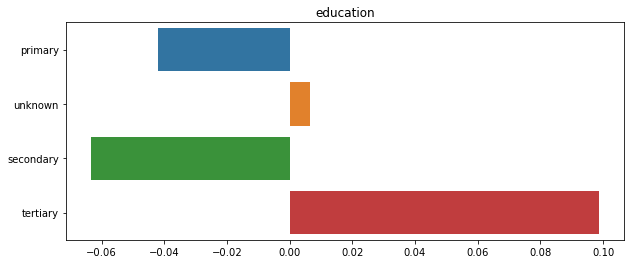

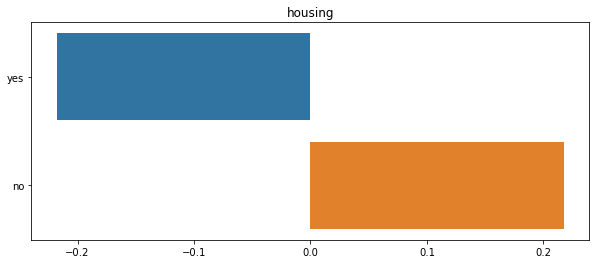

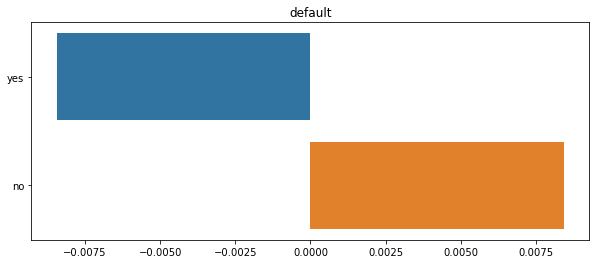

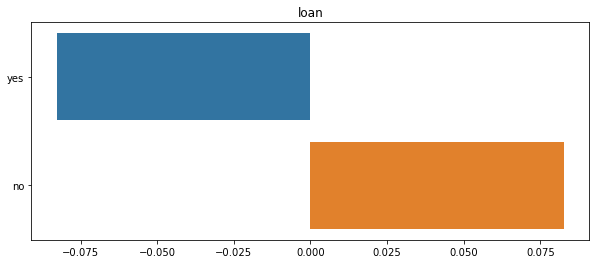

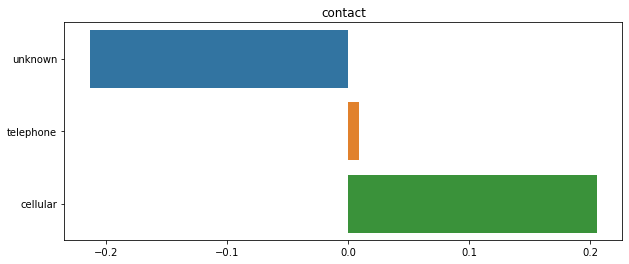

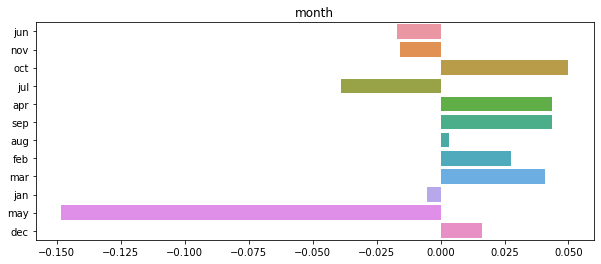

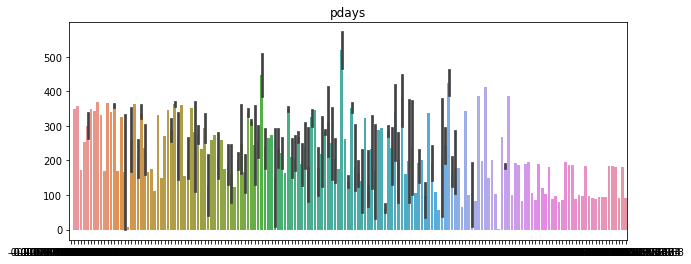

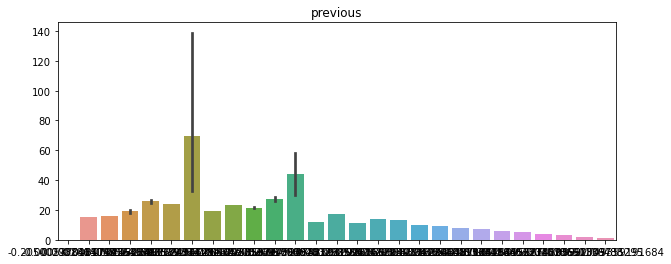

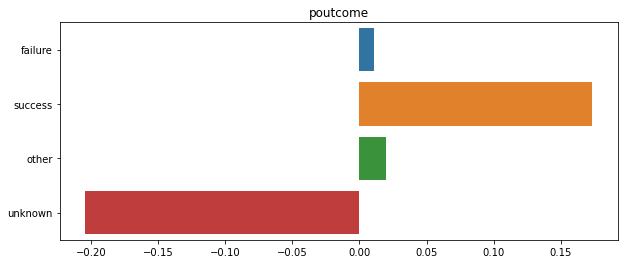

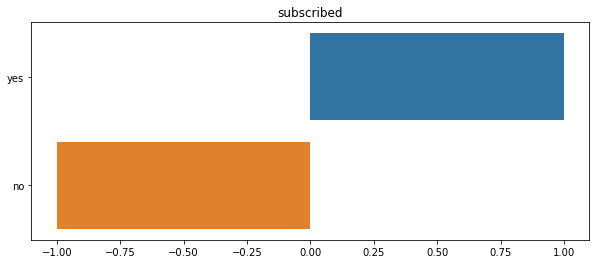

In [14]:
cat_var = ['job', 'marital', 'education','housing', 'default', 'loan', 'contact','month','pdays','previous', 'poutcome', 'subscribed']
for col in cat_var:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.subscribed.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.subscribed.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.subscribed.values == 'yes').sum()
    freq_neg = (df.subscribed.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.show()

In [15]:
significant_cat_variables = ['education','job','housing','loan']
for var in significant_cat_variables:
    df[var + '_un'] = (df[var] == 'unknown').astype(int)

In [16]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [17]:
cross_tab(df,'job','education')

,unknown,secondary,tertiary,primary
job,,,,
admin.,114,2983,393,141
blue-collar,325,3750,103,2664
entrepreneur,55,350,474,129
housemaid,34,283,122,435
management,165,799,5464,211
retired,82,683,258,551
self-employed,31,410,594,88
services,102,2421,145,235
student,118,346,146,25


In [31]:
features=['pdays', 'previous']
label=['subscribed']

X=df[features]
y=df[label]

<Figure size 576x576 with 0 Axes>

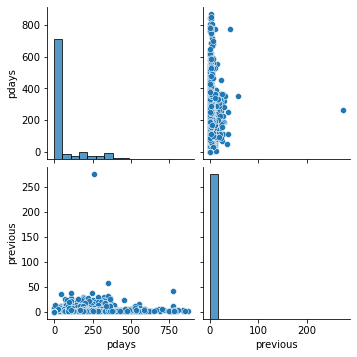

In [32]:
plt.figure(figsize=(8,8))
sns.pairplot(data=X)
plt.show()

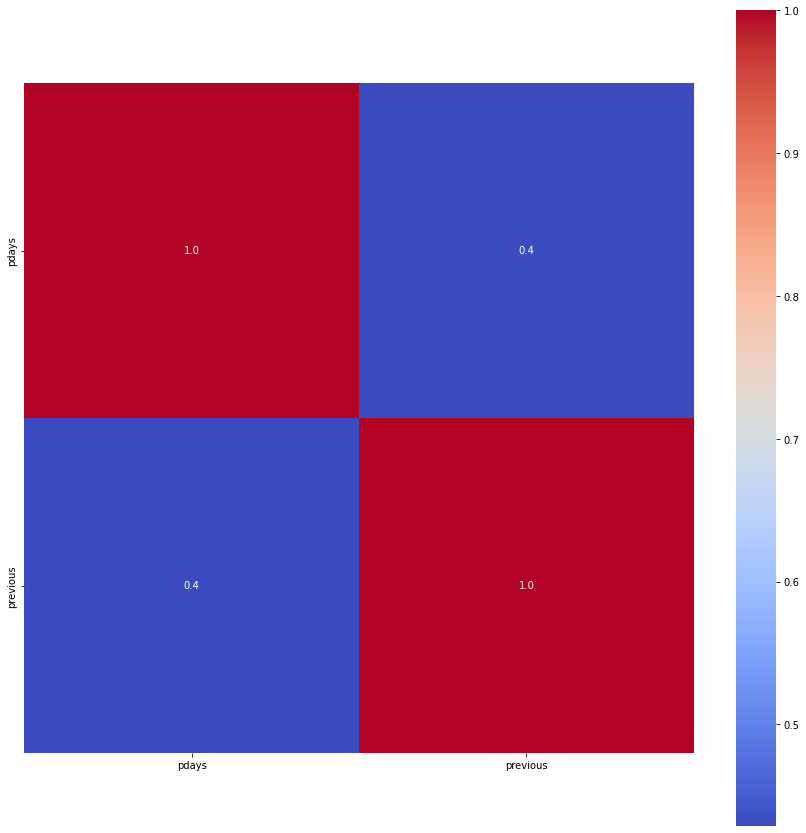

In [33]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',cmap= 'coolwarm')
plt.show()

In [37]:
from sklearn import preprocessing
X=preprocessing.scale(X)

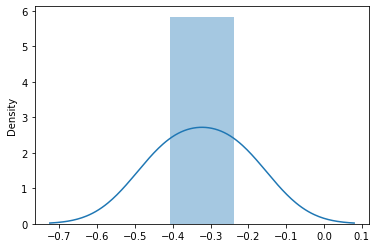

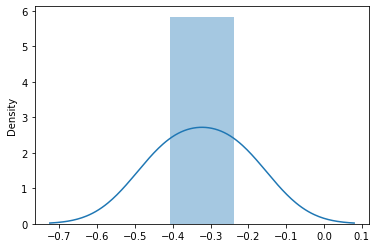

In [40]:
# visualizing data after preprocessing
x2 = X


for i in range(1,3):
        sns.distplot(x2[i])
        
        plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [36]:
# For LOgestic regression
lr= LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 88.24570273003033
Training Accuracy 88.17358331577839
[[6980    7]
 [ 923    2]]
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      6987
         yes       0.22      0.00      0.00       925

    accuracy                           0.88      7912
   macro avg       0.55      0.50      0.47      7912
weighted avg       0.81      0.88      0.83      7912



In [41]:
# For KNN
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_KNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy 88.16986855409505
Training Accuracy 89.12576364019381
[[6858  129]
 [ 807  118]]
              precision    recall  f1-score   support

          no       0.89      0.98      0.94      6987
         yes       0.48      0.13      0.20       925

    accuracy                           0.88      7912
   macro avg       0.69      0.55      0.57      7912
weighted avg       0.85      0.88      0.85      7912



In [42]:
# For Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,preddt)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_dt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 88.05611729019212
Training Accuracy 90.00631978091425
[[6867  120]
 [ 825  100]]
              precision    recall  f1-score   support

          no       0.89      0.98      0.94      6987
         yes       0.45      0.11      0.17       925

    accuracy                           0.88      7912
   macro avg       0.67      0.55      0.56      7912
weighted avg       0.84      0.88      0.85      7912



In [43]:
# For Random Forest Classifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_rdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 87.91708796764408
Training Accuracy 90.00210659363809
[[6841  146]
 [ 810  115]]
              precision    recall  f1-score   support

          no       0.89      0.98      0.93      6987
         yes       0.44      0.12      0.19       925

    accuracy                           0.88      7912
   macro avg       0.67      0.55      0.56      7912
weighted avg       0.84      0.88      0.85      7912



In [44]:
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svc)*100)
print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy 88.30889787664307
Training Accuracy 88.29155255951126
[[6978    9]
 [ 916    9]]
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      6987
         yes       0.50      0.01      0.02       925

    accuracy                           0.88      7912
   macro avg       0.69      0.50      0.48      7912
weighted avg       0.84      0.88      0.83      7912



### Checking cross validation score

In [47]:
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LR model :",cr_1.mean()*100)

Cross Validation Score of LR model : 88.2200517839969


In [48]:
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNN model :",cr_2.mean()*100)

Cross Validation Score of KNN model : 88.13157218820461


In [49]:
cr_3=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DT model :",cr_3.mean()*100)

Cross Validation Score of DT model : 87.86930394130981


In [50]:
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RDF model :",cr_4.mean()*100)

Cross Validation Score of RDF model : 87.91987283891173


In [51]:
cr_5=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of SVC model :",cr_5.mean()*100)

Cross Validation Score of SVC model : 88.2200517839969


### Hyper paramter tunning with RDF

In [52]:
RandomForestClassifier()
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

In [53]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)*100

88.39737108190091

## Roc_auc Curve

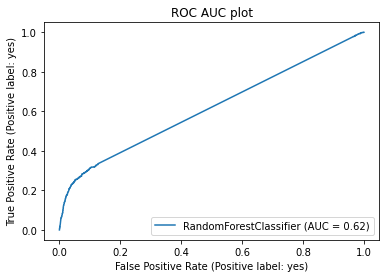

In [54]:
from sklearn.metrics import plot_roc_curve, auc 
plot_roc_curve(GCV.best_estimator_,X_test,y_test)  
plt.title("ROC AUC plot")
plt.show() 